# Retención de clientes

El objetivo de este notebook es presentar de forma detallada el proceso de desarrollo de un modelo de *Machine Learning* capaz de predecir si un cliente cerrará su cuenta bancaria o continuará siendo cliente de la entidad. El flujo de trabajo abarca desde el análisis exploratorio y el preprocesamiento de los datos hasta el entrenamiento y la evaluación del modelo, con el fin de obtener una solución eficaz para este problema de retención de clientes.

El problema a resolver forma parte de una competición de [Kaggle](https://www.kaggle.com/competitions/retencion-de-clientes-de-una-entidad-financiera/data).

## Librerías utilizadas

Para el desarrollo del modelo de *Machine Learning* se emplean las siguientes librerías:

- [**`Pandas`**](https://pandas.pydata.org/): Manipulación y análisis de datos estructurados.
- [**`NumPy`**](https://numpy.org/): Manejo eficiente de datos numéricos y operaciones matemáticas.
- [**`Matplotlib`**](https://matplotlib.org/): Visualización y análisis gráfico de los datos.
- [**`Seaborn`**](https://seaborn.pydata.org/): Visualización de datos con estilos.
- [**`Scikit-learn`**](https://scikit-learn.org/stable/): Entrenamiento, validación y evaluación de modelos de *Machine Learning*.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Configuración

En este sección es dónde se definen los parámetros globales para el proyecto.

In [41]:
TARGET = 'Exited'  # Variable objetivo

## Exploración

El conjunto de datos cuenta con un toatal de 10000 registros (80% de entrenamiento y 20% de prueba). Cada registro tiene las siguientes características:

1. Identificación del cliente:

    - `CustomerId`: Identificador único del cliente
    - `Surname`: Apellido del cliente

2. Información financiera:

    - `CreditScore`: Calificación crediticia. Establece la capacidad de una persona para pagar su deuda y el riesgo que conlleva invertir con ella.
    - `Balance`: Saldo en la cuenta bancaria
    - `NumOfProducts`: Número de productos bancarios que utiliza
    - `HasCrCard`: Si tiene tarjeta de crédito (0 = no, 1 = sí)
    - `EstimatedSalary`: Salario estimado

3. Información demográfica y personal:

    - `Geography`: País de residencia
    - `Gender`: Género (Male/Female)
    - `Age`: Edad
    - `Tenure`: Años como cliente del banco
    - `IsActiveMember`: Si es un miembro activo del banco (0 = no, 1 = sí)

4. Variable objetivo:

    - `Exited`: Indicador binario de abandono del banco (0 = se queda, 1 = se va)


In [42]:
# Cargamos los datos
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

print("Train DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)
print("Train dataframe")
display(train_df.head())
print("Train dataframe description")
display(train_df.describe())

Train DataFrame shape: (8000, 13)
Test DataFrame shape: (2000, 12)
Train dataframe


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15759244,Boone,687.0,Germany,Male,44,8,95368.14,2.0,1.0,1,1787.85,0
1,15725997,She,660.0,France,Female,35,6,100768.77,1.0,1.0,0,19199.61,0
2,15724296,Kerr,684.0,Spain,Male,41,2,119782.72,2.0,0.0,0,120284.67,0
3,15636820,Loggia,725.0,Germany,Male,40,8,104149.66,1.0,1.0,0,62027.90,0
4,15744529,Chiekwugo,510.0,France,Male,63,8,0.00,2.0,1.0,1,115291.86,0


Train dataframe description


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8.000000e+03,6359.000000,8000.000000,8000.000000,6385.000000,7024.000000,7625.000000,8000.000000,7168.000000,8000.00000
mean,1.569119e+07,661.235257,38.935000,5.013875,76929.669179,1.539721,0.706623,0.513500,100057.165753,0.20375
std,7.187227e+04,95.876126,10.381389,2.888810,62292.133487,0.574125,0.455340,0.499849,57441.733108,0.40281
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.00000
25%,1.562896e+07,595.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51545.352500,0.00000
50%,1.569112e+07,664.000000,37.000000,5.000000,98009.130000,2.000000,1.000000,1.000000,100129.075000,0.00000
75%,1.575373e+07,729.000000,44.000000,8.000000,127660.460000,2.000000,1.000000,1.000000,149216.320000,0.00000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.00000


In [43]:
# Información general
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       8000 non-null   int64  
 1   Surname          7591 non-null   object 
 2   CreditScore      6359 non-null   float64
 3   Geography        8000 non-null   object 
 4   Gender           8000 non-null   object 
 5   Age              8000 non-null   int64  
 6   Tenure           8000 non-null   int64  
 7   Balance          6385 non-null   float64
 8   NumOfProducts    7024 non-null   float64
 9   HasCrCard        7625 non-null   float64
 10  IsActiveMember   8000 non-null   int64  
 11  EstimatedSalary  7168 non-null   float64
 12  Exited           8000 non-null   int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 812.6+ KB


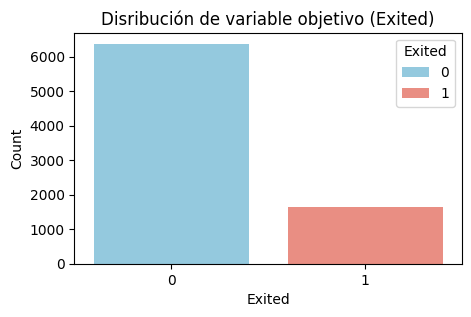

In [56]:
# Distribución de la variable objetivo
plt.figure(figsize=(5,3))
sns.countplot(x=TARGET, data=train_df, palette=['skyblue','salmon'], hue=TARGET)
plt.title('Disribución de variable objetivo (Exited)')
plt.xlabel(TARGET)
plt.ylabel('Count')
plt.show()

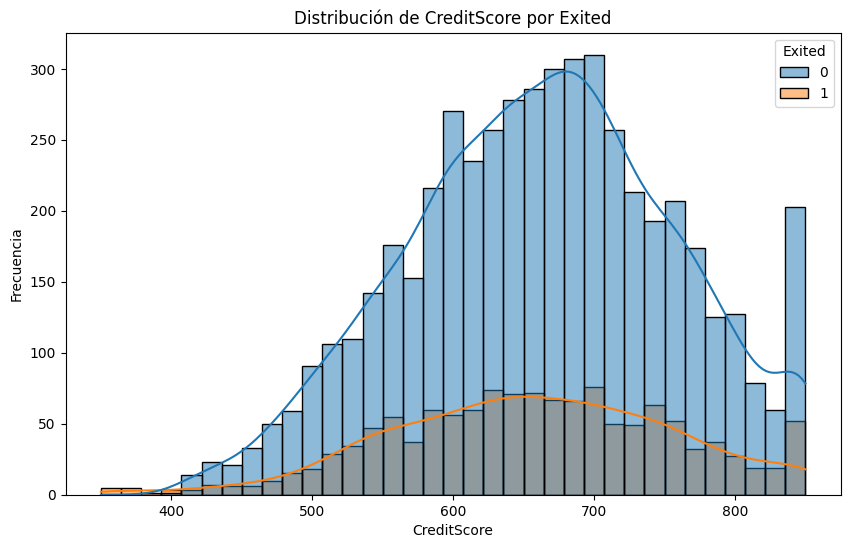

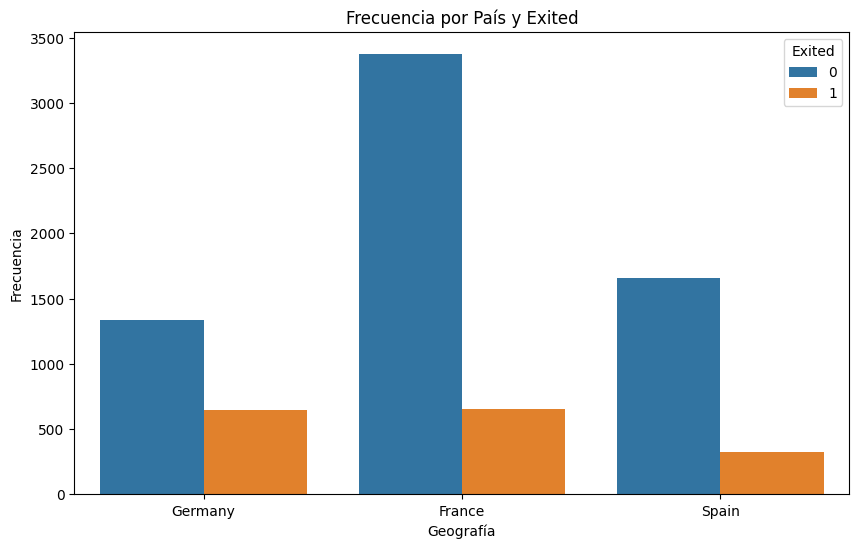

In [45]:
# Distibución de CreditScore por Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='CreditScore', hue=TARGET, kde=True)
plt.title(f'Distribución de CreditScore por {TARGET}')
plt.xlabel('CreditScore')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

# Frecuancia de País y Excited
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', data=train_df, hue=TARGET, palette='tab10')
plt.title(f'Frecuencia por País y {TARGET}')
plt.xlabel('Geografía')
plt.ylabel('Frecuencia')
plt.show()

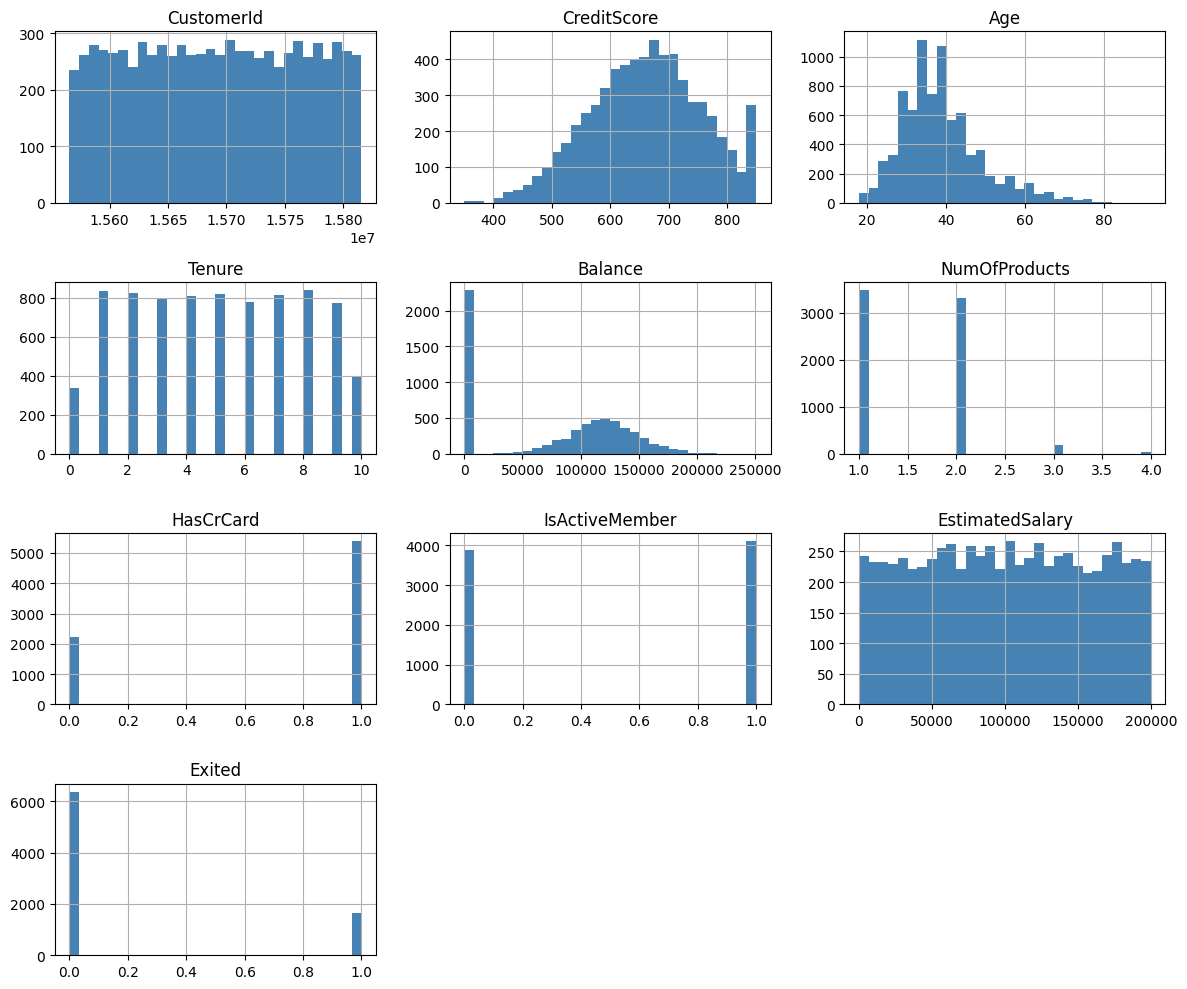

In [50]:
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
# Histogramas
train_df[num_cols].hist(figsize=(12,10), bins=30, color='steelblue')
plt.tight_layout()
plt.show()

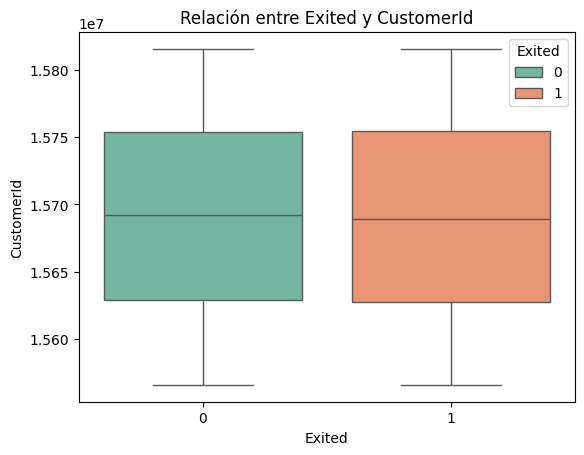

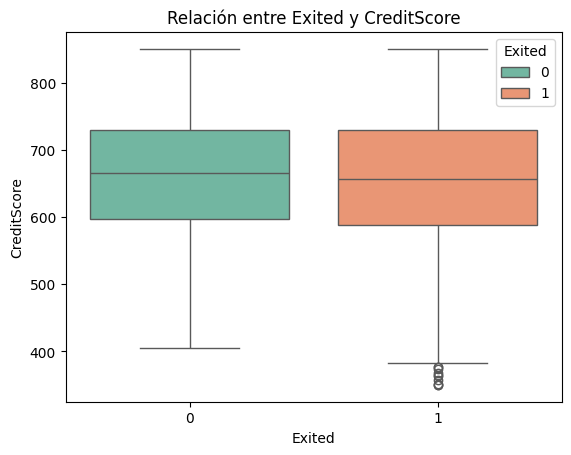

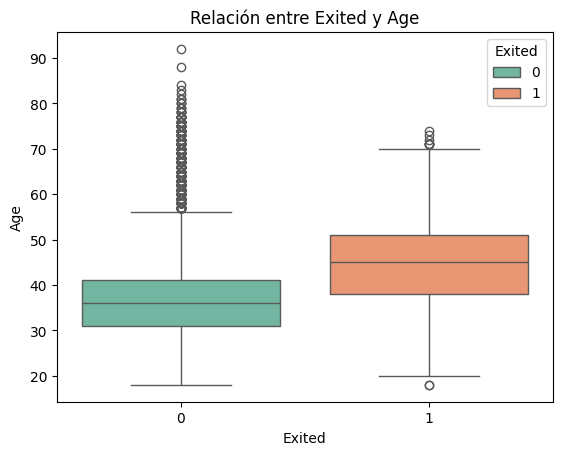

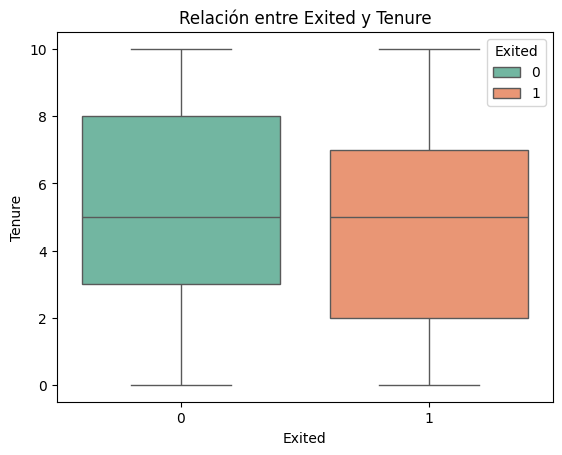

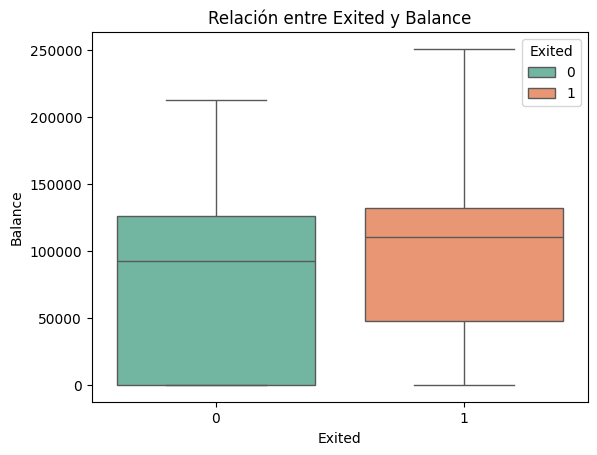

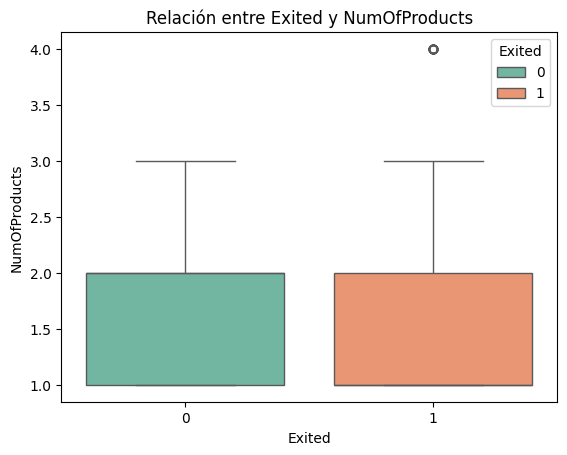

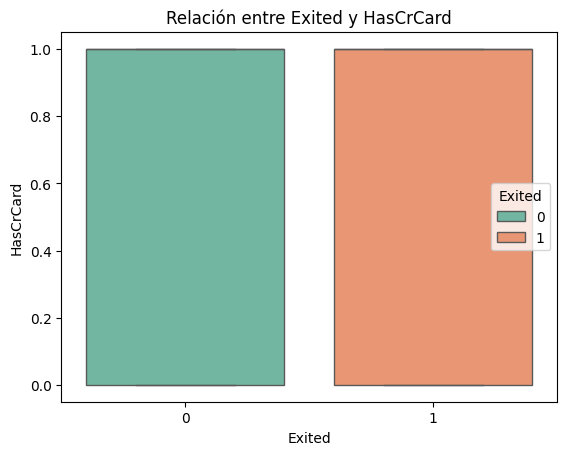

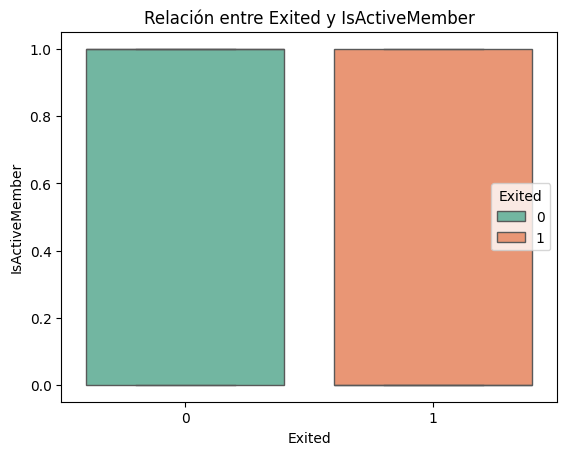

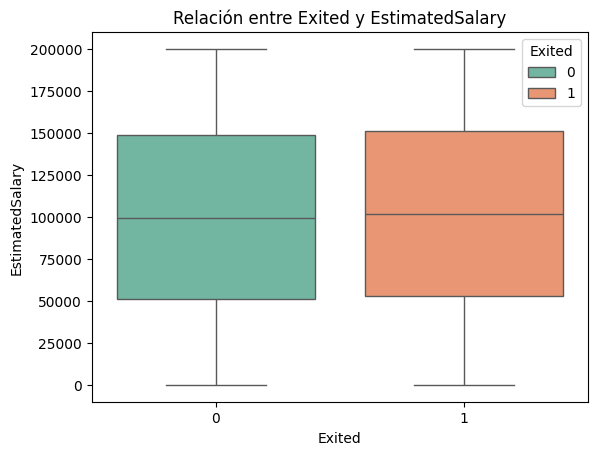

In [51]:
# Relación entre Exited y variables numéricas
for col in num_cols:
    if col != TARGET:
        sns.boxplot(x=TARGET, y=col, data=train_df, palette='Set2', hue=TARGET)
        plt.title(f'Relación entre Exited y {col}')
        plt.show()

In [54]:
# # Correlaciones
# corr_mx = train_df[num_cols].corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(corr_mx, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
# plt.title('Matriz de correlación')
# plt.show()


## Preprocesamiento

In [ ]:
# Valores nulos en el conjunto de entrenamiento y test
train_nan_columns = train_df.isnull().sum()
test_nan_columns = test_df.isnull().sum()
print(f"Valores nulos en el conjunto de entrenamiento:\n{train_nan_columns}")
print(f"Valores nulos en el conjunto de test:\n{test_nan_columns}")

## Modelo

## Evaluación